Лучшим решением для обработки естественного языка являются ДВУНАПРАВЛЕННЫЕ РЕКУРРЕНТНЫЕ СЕТИ.

Они представляют собой две сети, каждая из которых обрабатывает последовательность в прямом и обратном порядке, а затем результаты объединяются.

Однако, если ОДНОЙ сетью обрабатывать временную последовательность в обратном порядке, то точность будет низкая.

Но это не всегда так. Рассмотрим пример с IMDB. Данные будут обрабатываться в обратном порядке.

Epoch 1/10
157/157 [==============================] - 69s 437ms/step - loss: 0.5180 - accuracy: 0.7464 - val_loss: 0.3640 - val_accuracy: 0.8602
Epoch 2/10
157/157 [==============================] - 71s 452ms/step - loss: 0.3194 - accuracy: 0.8762 - val_loss: 0.3267 - val_accuracy: 0.8670
Epoch 3/10
157/157 [==============================] - 71s 452ms/step - loss: 0.2605 - accuracy: 0.9010 - val_loss: 0.3672 - val_accuracy: 0.8624
Epoch 4/10
157/157 [==============================] - 71s 449ms/step - loss: 0.2236 - accuracy: 0.9204 - val_loss: 0.3765 - val_accuracy: 0.8342
Epoch 5/10
157/157 [==============================] - 70s 444ms/step - loss: 0.1909 - accuracy: 0.9327 - val_loss: 0.3597 - val_accuracy: 0.8754
Epoch 6/10
157/157 [==============================] - 70s 444ms/step - loss: 0.1789 - accuracy: 0.9362 - val_loss: 0.3475 - val_accuracy: 0.8606
Epoch 7/10
157/157 [==============================] - 70s 444ms/step - loss: 0.1526 - accuracy: 0.9464 - val_loss: 0.4551 - val_ac

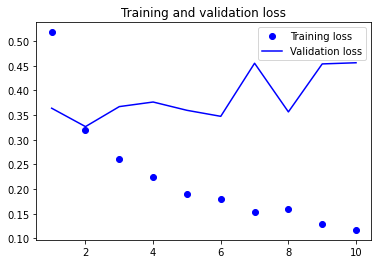

In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, LSTM, GRU, Flatten, Embedding
from keras.models import Sequential

max_words = 10_000
max_word_length = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_words)

# обращение последовательностей
x_train = [x[::-1] for x in x_train]
x_test = [x[::-1] for x in x_test]

# превращение массива массивов в двумерный numpy массив размером (кол-во образцов, maxlen)
x_train = sequence.pad_sequences(x_train, maxlen=max_word_length)
x_test = sequence.pad_sequences(x_test, maxlen=max_word_length)

model = Sequential()
# превращение целых чисел в векторы фиксированной длина - max_words
model.add(Embedding(max_words, 128))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2).history

def draw_graph(history):
  import matplotlib.pyplot as plt
  loss = history['loss']
  val_loss = history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.figure()
  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

draw_graph(history)

Из полученных результатов можно сделать вывод:

Порядок следования слов в предложении важен для понимая, однако порядок обработки не имеет такого большого значения.

Теперь создадим двунаправленный слой для обработки того же датасета.

Он явно быстро переобучается - решение не эффективное

Epoch 1/10
157/157 [==============================] - 23s 146ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 2/10
157/157 [==============================] - 22s 138ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_accuracy: 0.4938
Epoch 3/10
157/157 [==============================] - 22s 138ms/step - loss: 0.6932 - accuracy: 0.4958 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 4/10
157/157 [==============================] - 22s 137ms/step - loss: 0.6931 - accuracy: 0.5038 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 5/10
157/157 [==============================] - 22s 137ms/step - loss: 0.6932 - accuracy: 0.5015 - val_loss: 0.6933 - val_accuracy: 0.4938
Epoch 6/10
157/157 [==============================] - 22s 138ms/step - loss: 0.6932 - accuracy: 0.5005 - val_loss: 0.6931 - val_accuracy: 0.5062
Epoch 7/10
157/157 [==============================] - 22s 138ms/step - loss: 0.6932 - accuracy: 0.4988 - val_loss: 0.6932 - val_ac

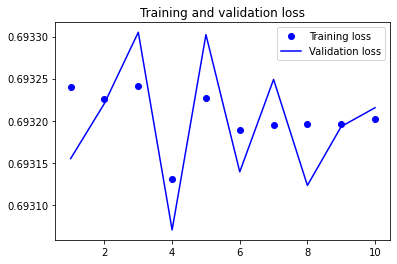

In [ ]:
from keras.layers import Bidirectional

bi_model = Sequential()
model.add(Embedding(max_words, 32))
# Bidirectional принимает в качестве аргумента какой-либо рекуррентный слой и создает
# его второй образец, который работает с конца
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

bi_history = model.fit(
    x_train, 
    y_train,
    batch_size = 128,
    epochs = 10,
    validation_split=0.2
).history

draw_graph(bi_history)